# **The goal of collecting this dataset**

The goal is to classify Mobile Prices based on mobile specifications. The data will be classified into four categories {0, 1, 2, 3}, and each category indicates the related Mobile specifications with other phones will be classified to the same price range. where  0 indicates a low price, 1 indicates an intermediate price closer to low, 2 indicates an intermediate price closer to high, and 3 indicates a high price.

# **The source of the dataset**
The dataset is called Mobile Price Classification, which we got from Kaggle.com by downloading the CSV file. It is data for classifying mobiles based on its specification into four ranges of price. 
URL: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as plex
import collections
from collections import Counter
import bidi.algorithm
from bidi.algorithm import get_display
from datetime import datetime
from datetime import timedelta
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [7]:
test = pd.read_csv("/kaggle/input/mobile-price-classification/test.csv")
train = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")

# **Number of rows and columns in each dataset (train and test)**

In [8]:
nRow, nCol = train.shape
f'There are {nRow} rows and {nCol} columns in train dataset'

'There are 2000 rows and 21 columns in train dataset'

In [9]:
nRow, nCol = test.shape
f'There are {nRow} rows and {nCol} columns in test dataset'

'There are 1000 rows and 21 columns in test dataset'

# **About the Dataset**

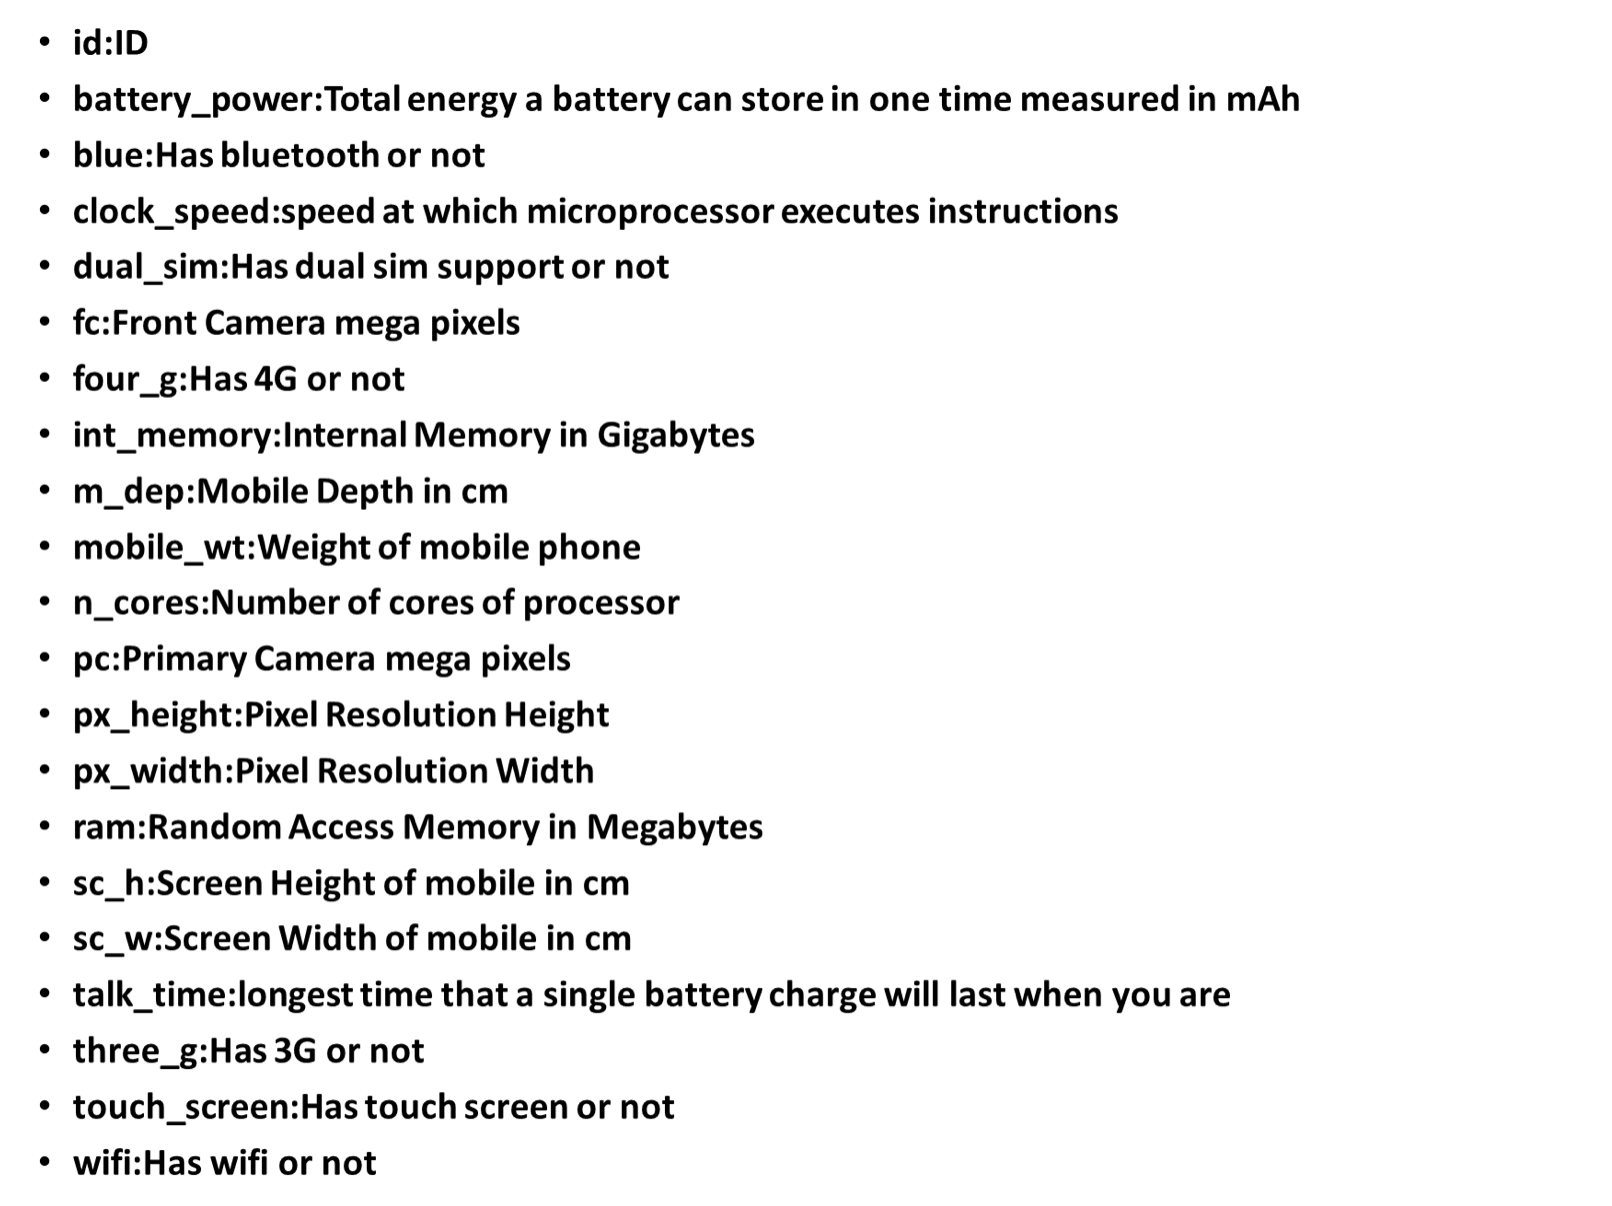

# **Sample of 5 observations from the dataset**

In [10]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# **Data type of each column**

In [11]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

# **Missing values**

In [12]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# **Checking Duplicate Values**

In [13]:
train.duplicated().sum()

0

# **statistical summary of each column**

In [14]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [15]:
variance = np.var(train)
print("Variance of the dataset:")
variance

Variance of the dataset:


battery_power    1.929918e+05
blue             2.499750e-01
clock_speed      6.655299e-01
dual_sim         2.499098e-01
fc               1.883871e+01
four_g           2.495378e-01
int_memory       3.291023e+02
m_dep            8.314194e-02
mobile_wt        1.252509e+03
n_cores          5.231580e+00
pc               3.675753e+01
px_height        1.968429e+05
px_width         1.867030e+05
ram              1.176055e+06
sc_h             1.774256e+01
sc_w             1.896871e+01
talk_time        2.983988e+01
three_g          1.816178e-01
touch_screen     2.499910e-01
wifi             2.499510e-01
price_range      1.250000e+00
dtype: float64

# **variables disturbution**

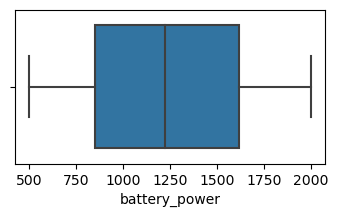

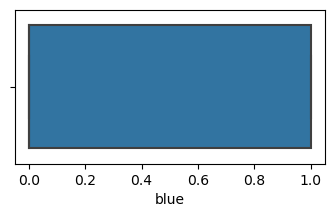

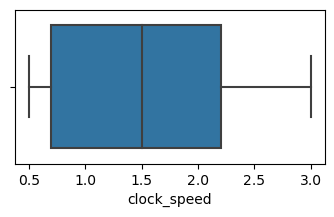

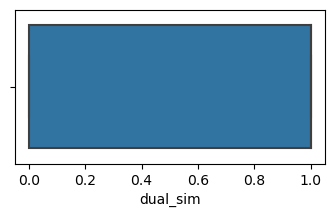

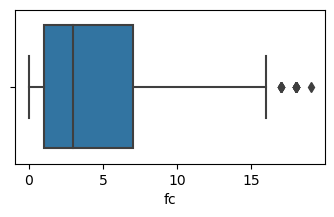

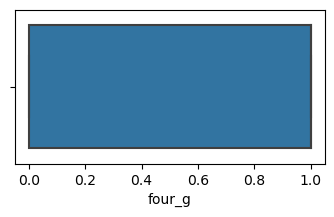

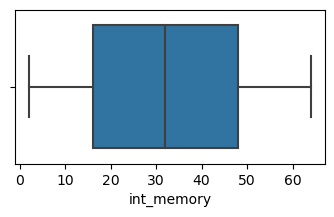

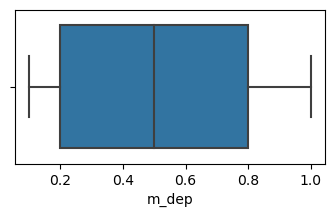

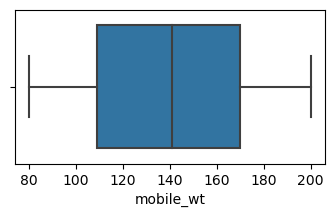

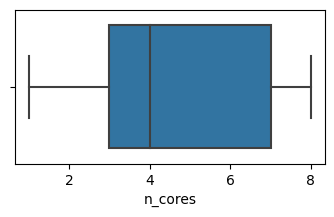

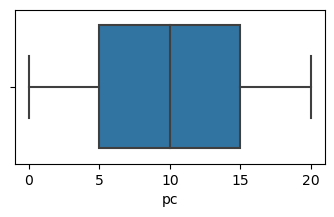

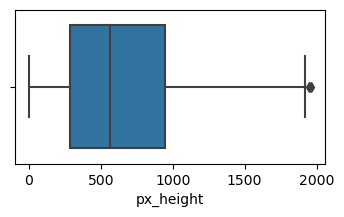

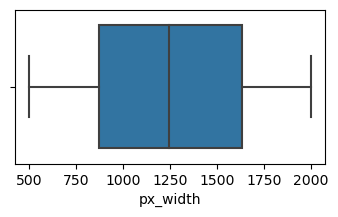

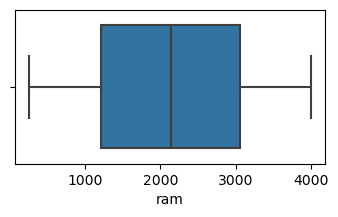

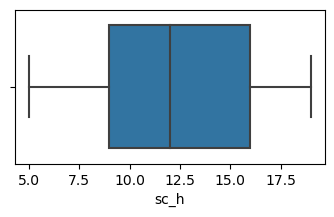

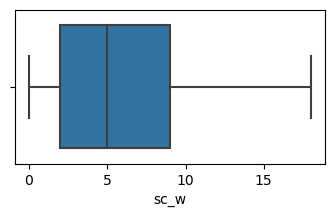

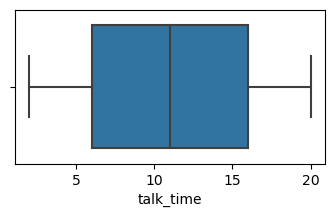

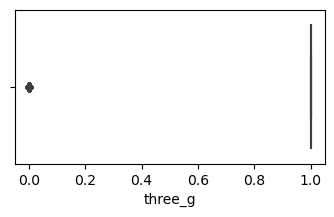

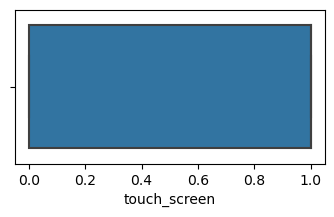

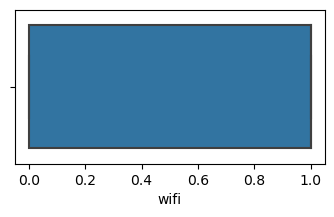

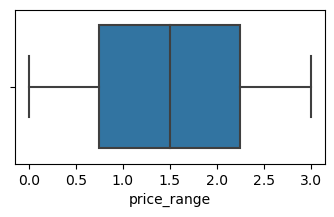

In [16]:
for i in train.columns:
    plt.figure(figsize = (4,2))
    sns.boxplot(data = train,x = i)
    plt.show()

****From the above graph it is clear that there is no outlier in any feature and all are in range.***

<AxesSubplot:ylabel='three_g'>

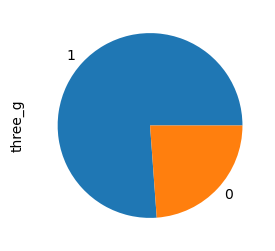

In [17]:
pie=train['three_g'].value_counts()
plt.figure(figsize = (6,3))
pie.plot(kind = "pie")

<AxesSubplot:ylabel='price_range'>

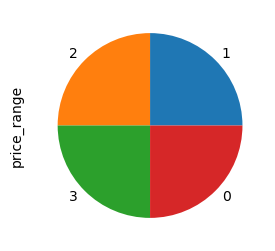

In [18]:
pie=train['price_range'].value_counts()
plt.figure(figsize = (6,3))
pie.plot(kind = "pie")

<AxesSubplot:ylabel='blue'>

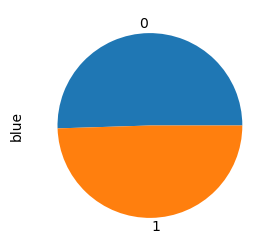

In [19]:
pie=train['blue'].value_counts()
plt.figure(figsize = (6,3))
pie.plot(kind = "pie")

<AxesSubplot:ylabel='dual_sim'>

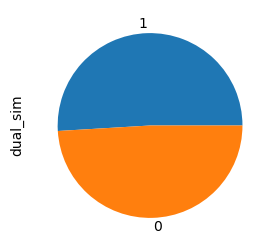

In [20]:
pie=train['dual_sim'].value_counts()
plt.figure(figsize = (6,3))
pie.plot(kind = "pie")

<AxesSubplot:ylabel='four_g'>

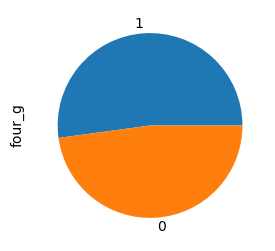

In [21]:
pie=train['four_g'].value_counts()
plt.figure(figsize = (6,3))
pie.plot(kind = "pie")

<AxesSubplot:ylabel='four_g'>

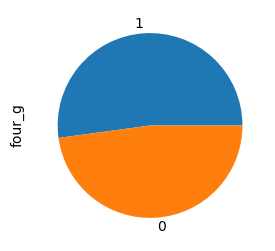

In [22]:
pie=train['four_g'].value_counts()
plt.figure(figsize = (6,3))
pie.plot(kind = "pie")

<AxesSubplot:ylabel='touch_screen'>

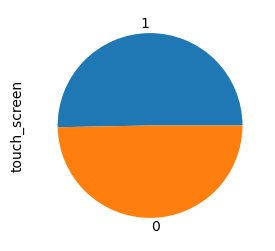

In [23]:
pie=train['touch_screen'].value_counts()
plt.figure(figsize = (6,3))
pie.plot(kind = "pie")

<AxesSubplot:ylabel='wifi'>

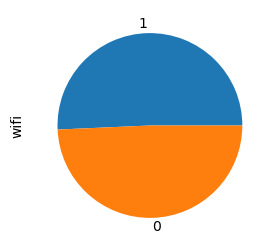

In [24]:
pie=train['wifi'].value_counts()
plt.figure(figsize = (6,3))
pie.plot(kind = "pie")

****There's a quite a symmetrical distribution in the variables above except the variable three_g***

# 

# **variable disturbution using histogram**

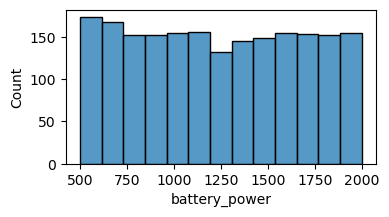

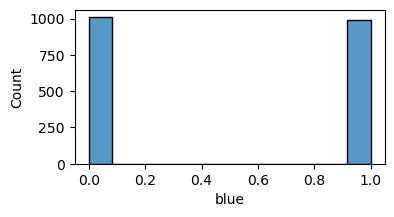

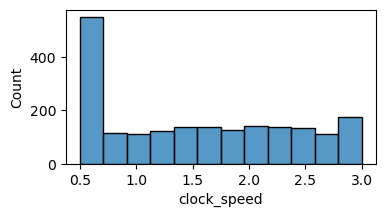

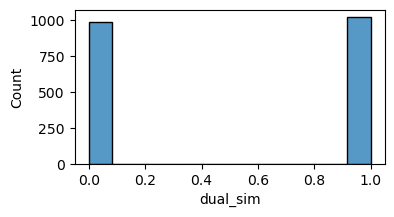

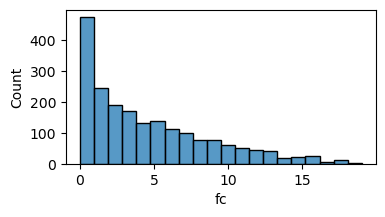

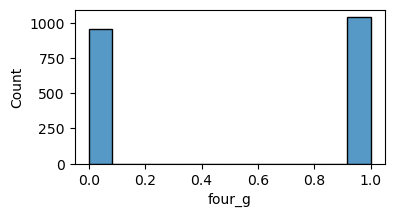

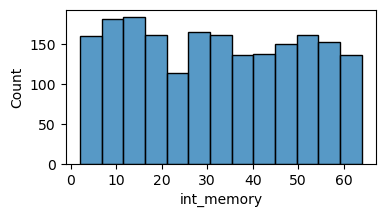

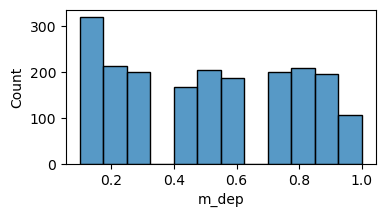

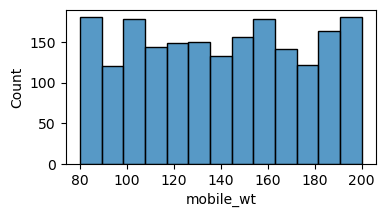

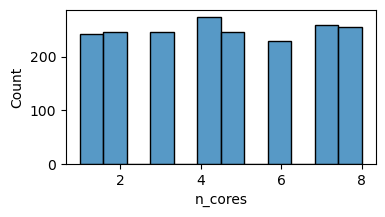

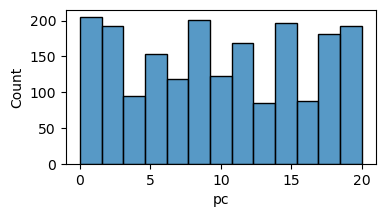

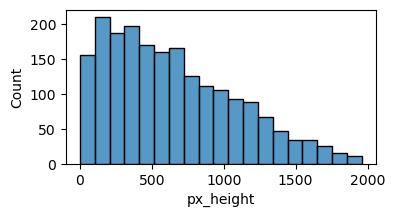

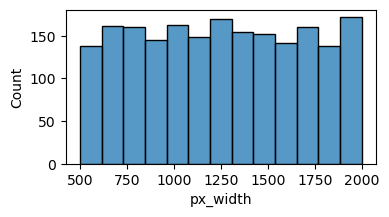

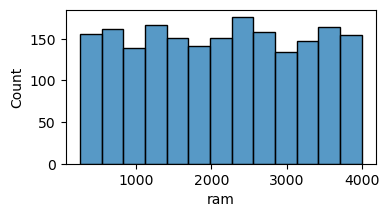

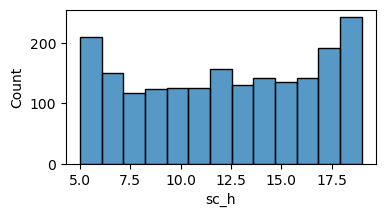

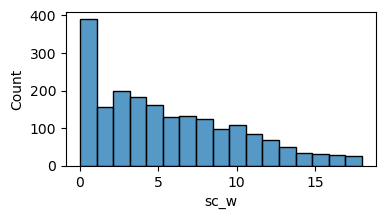

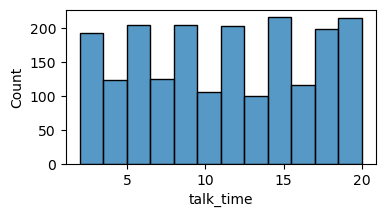

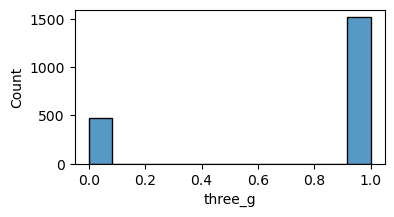

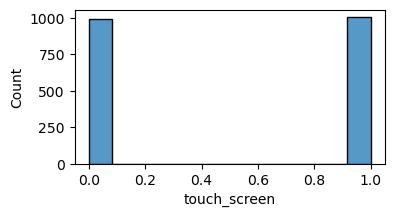

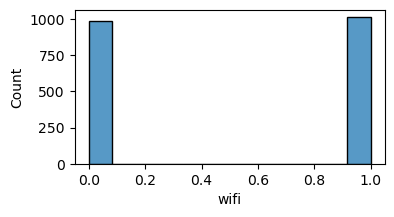

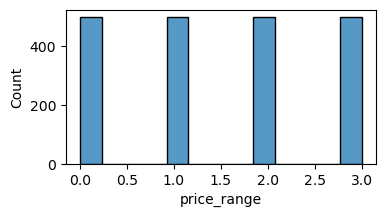

In [25]:
for i in train.columns:
    plt.figure(figsize = (4,2))
    sns.histplot(data = train,x = i)
    plt.show()

****According to the graphs above it was obseerbed that:***
- There is a wide range of battery power, int_memmory(Internal memory), talk_time, m_depth(Mobile depth), mobile_wt(Mobile width), n_cores(Number of cores), pc(Primary camera), px_width(Pixel resolution width), ram, sc_h(Screen hight), wifi, touch screen and price_range.

- Majority of mobile phones have three_g(3G), sc_w(Screen width) with 0cm, px_height(Pixel resolution width) with more than 1000 pixels, fc(Front camera) with 0 mega pixels, clock speed with 0.5.

- The distribution of fc(Front camera), px_height(Pixel resolution height), sc_w(Screen width) are left skewed 

# **Correlation between Variables**

In [26]:
cols = train.corr().nlargest(10,'price_range')['price_range'].index

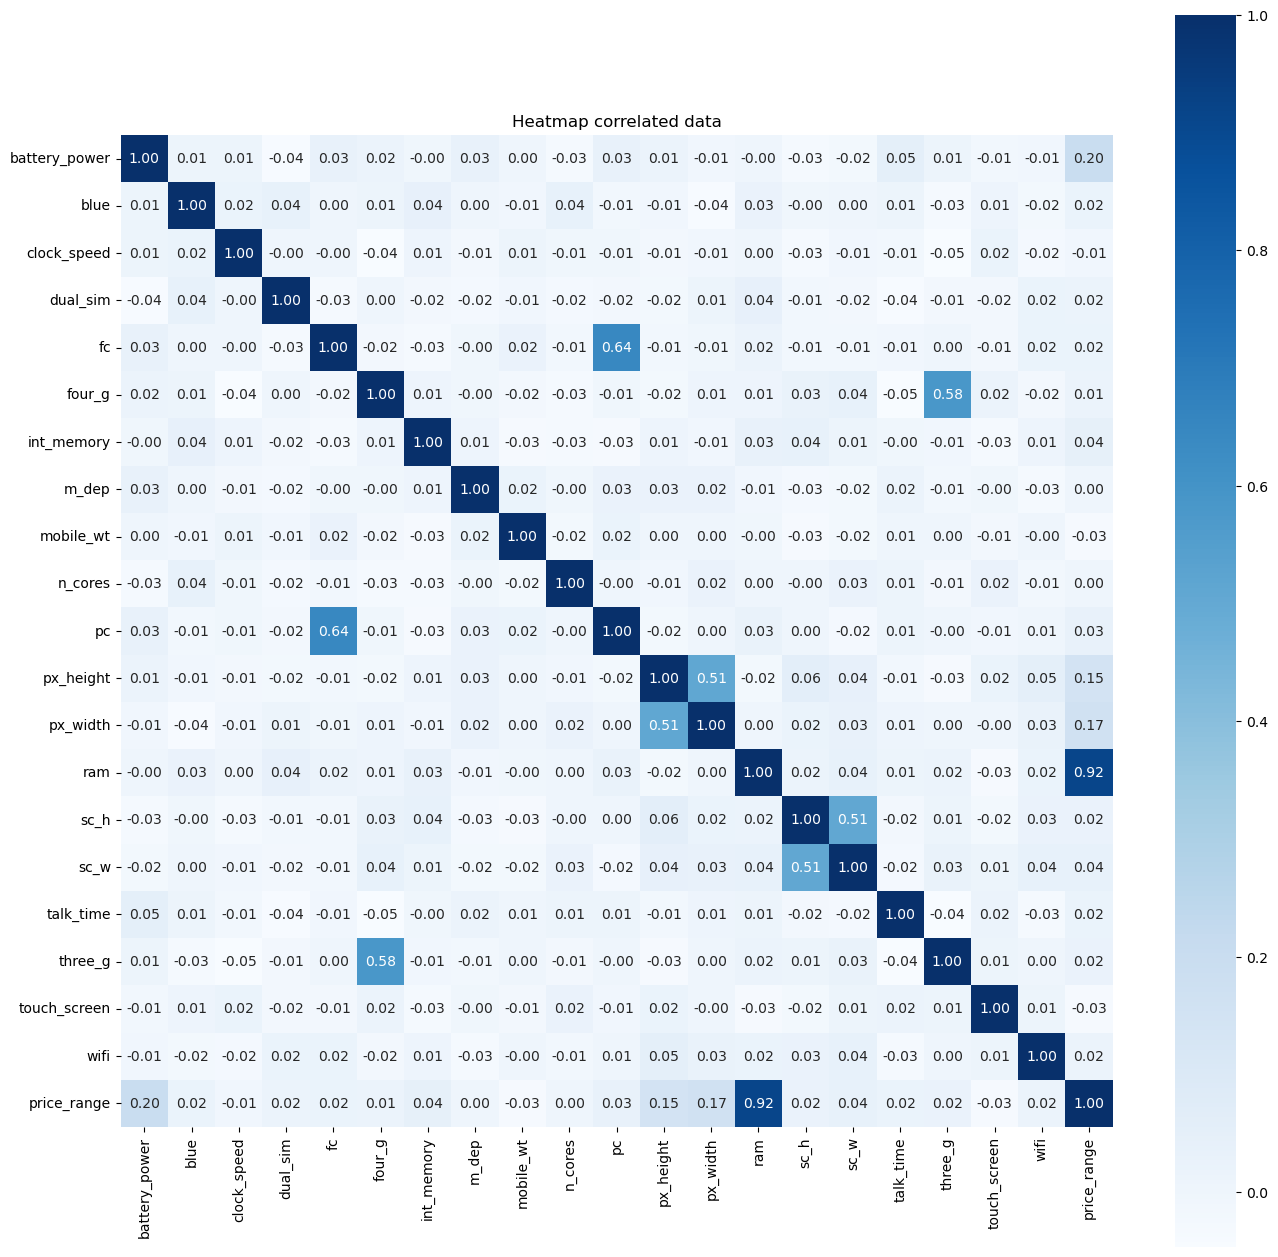

In [27]:
plt.figure(figsize=(16,16))
ax= plt.axes()
sns.heatmap(train.corr(),cmap = 'Blues',cbar=True, annot=True, square=True, fmt='.2f',ax=ax)
ax.set_title('Heatmap correlated data')
plt.show()

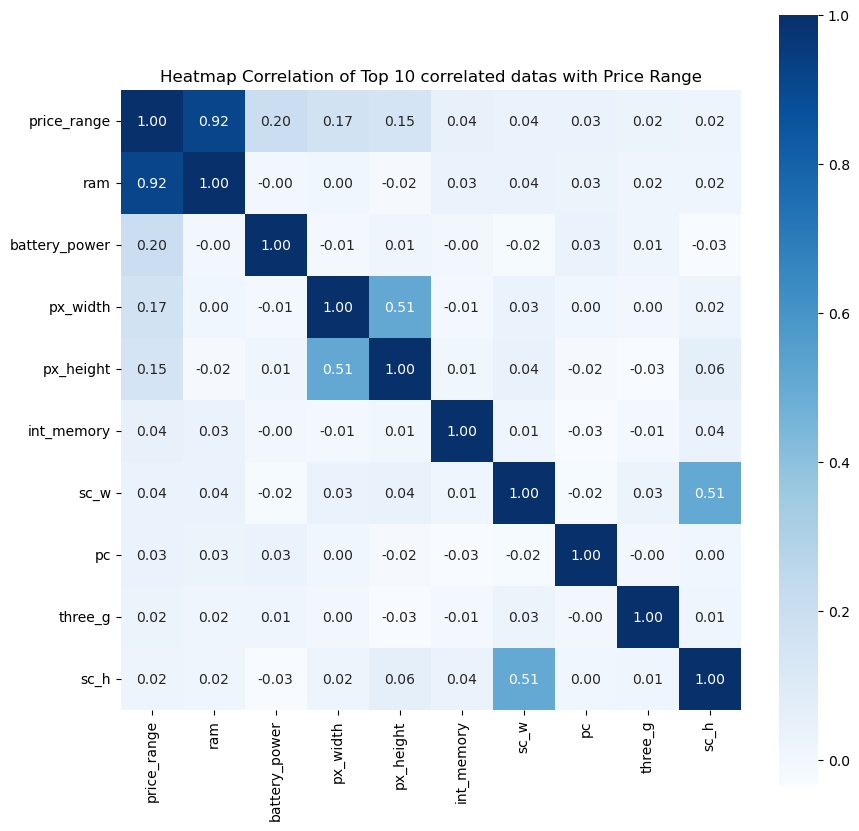

In [28]:
plt.figure(figsize=(10,10))
ax= plt.axes()
sns.heatmap(train[cols].corr(),cmap = 'Blues',cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,ax = ax)
ax.set_title('Heatmap Correlation of Top 10 correlated datas with Price Range')
plt.show()

**According to the graph above:**

there's correlation between px_height(pixel resolution hight) and px_width(pixel resolution width), sc_w(screen hight) and sc_h(screen width), and a hight correlation between price_range and ram 

# **Data prepocessing**

- # Variable transformation, Discretization:
Our data does not need variable transformation or discretization.

- # Values removal:
As mentioned above, there are no missed values nor duplicated values. So, there is no need for values removal.

- # Variables removal:
The last figure above shows the top 10 correlated data with the price range. So, for best results we can reduce the dimensions of our data by removing the less correlated variables.

In [29]:
# top 10 correlated variables with price_range
train = train[['price_range', 'ram', 'battery_power', 'px_width', 'px_height',
       'int_memory', 'sc_w', 'pc', 'three_g', 'sc_h']] 


In [30]:
train.head()

,price_range,ram,battery_power,px_width,px_height,int_memory,sc_w,pc,three_g,sc_h
0,1,2549,842,756,20,7,7,2,0,9
1,2,2631,1021,1988,905,53,3,6,1,17
2,2,2603,563,1716,1263,41,2,6,1,11
3,2,2769,615,1786,1216,10,8,9,1,16
4,1,1411,1821,1212,1208,44,2,14,1,8


- # Normalization:
1- [This website](https://sender11.typepad.com/sender11/2008/04/mobile-screen-s.html) shows that the minimum screen resolution in px for mobile phones since 2005 is 96x65. So, we will check our data if there exist resolutions less than 96x65 and we will replace them with 96x65.

In [31]:
print('*Train data*')
print('mobiles that have px_height less than 96: ',len(train[(train['px_height']<96)]))
print('mobiles that have px_width less than 65: ',len(train[(train['px_width']<65)]))
print('------------------------------------------------------------')
print('*Test data*')
print('mobiles that have px_height less than 96: ',len(test[(test['px_height']<96)]))
print('mobiles that have px_width less than 65: ',len(test[(test['px_width']<65)]))

*Train data*
mobiles that have px_height less than 96:  143
mobiles that have px_width less than 65:  0
------------------------------------------------------------
*Test data*
mobiles that have px_height less than 96:  91
mobiles that have px_width less than 65:  0


In [32]:
train['px_height'].replace(train['px_height'][(train['px_height']<128)].values,128,inplace=True)
test['px_height'].replace(test['px_height'][(test['px_height']<128)].values,128,inplace=True)

2- [This link](https://www.amazon.com/t2-Worlds-Smallest-Travelling-Manufacturer/dp/B08NG5QLZZ/ref=sr_1_5?keywords=world+smallest+phone&qid=1682465051&sr=8-5) shows the world smallest phone with approximately 4.5 cm as screen height and 2 cm as screen width. So, we will check our data if there exist screen height / width less than these values and we will replace them.

In [33]:
print('*Train data*')
print('mobiles that have sc_h less than 4.5: ',len(train[(train['sc_h']<4.5)]))
print('mobiles that have sc_w less than 2: ',len(train[(train['sc_w']<2)]))
print('------------------------------------------------------------')
print('*Test data*')
print('mobiles that have sc_h less than 4.5: ',len(test[(test['sc_h']<4.5)]))
print('mobiles that have sc_w less than 2: ',len(test[(test['sc_w']<2)]))

*Train data*
mobiles that have sc_h less than 4.5:  0
mobiles that have sc_w less than 2:  390
------------------------------------------------------------
*Test data*
mobiles that have sc_h less than 4.5:  0
mobiles that have sc_w less than 2:  211


In [34]:
train['sc_w'].replace(train['sc_w'][(train['sc_w']<2)].values,2,inplace=True)
test['sc_w'].replace(test['sc_w'][(test['sc_w']<2)].values,2,inplace=True)

- # Exporting preprocessed data:


In [35]:
train.to_csv('preprocessed_data.csv',index=False)